In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import LabelEncoder

In [2]:
#loading the dataset
train= pd.read_csv(r"C:\Users\T.B\Downloads\Train.csv")

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
train.shape

(8523, 12)

In [7]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

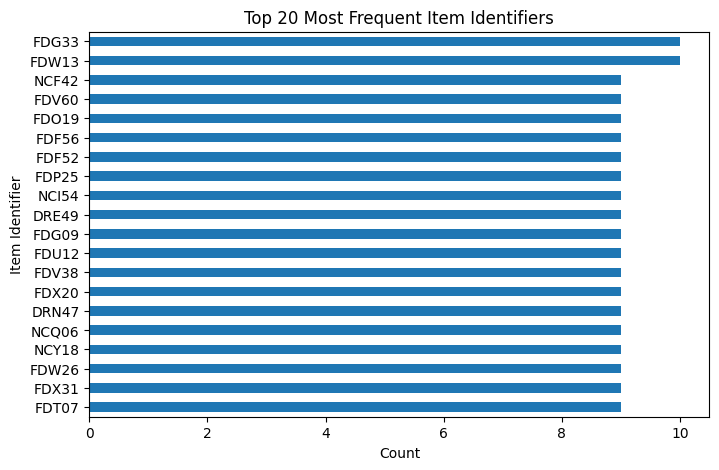

In [8]:
top_n = 20 
vc = train['Item_Identifier'].value_counts().head(top_n)

plt.figure(figsize=(8,5))
vc.sort_values().plot(kind='barh') 
plt.title(f'Top {top_n} Most Frequent Item Identifiers')
plt.xlabel('Count')
plt.ylabel('Item Identifier')
plt.show()

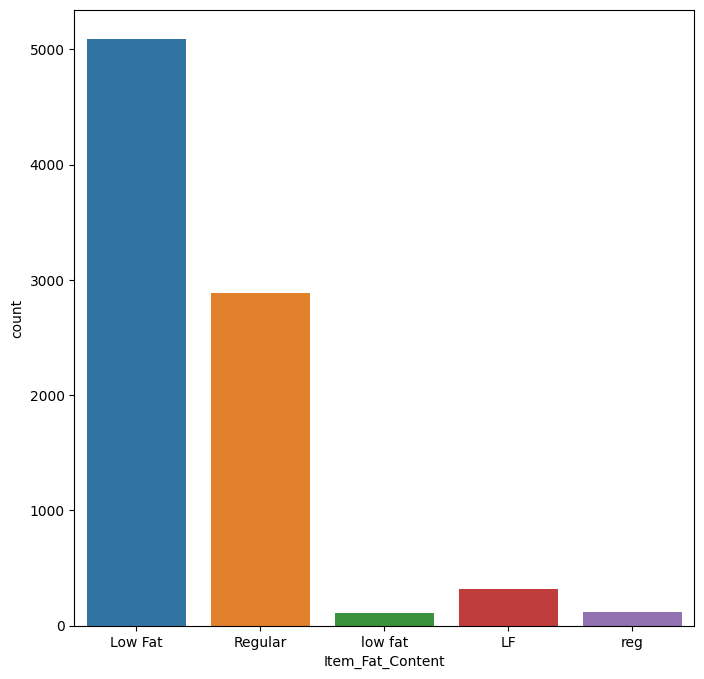

In [9]:
plt.figure(figsize=(8,8))
sns.countplot(x = train['Item_Fat_Content'],palette='tab10')
plt.show()

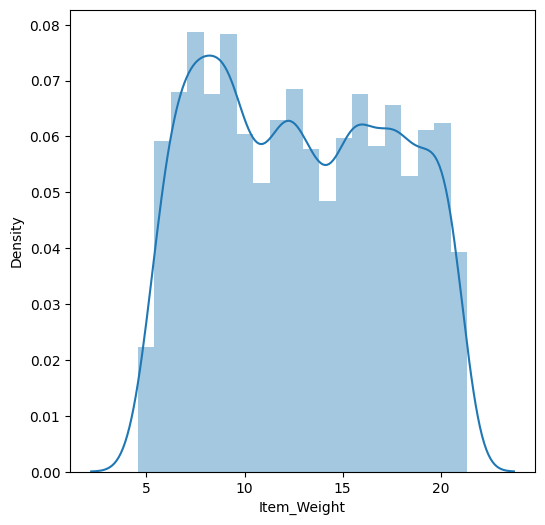

In [10]:
plt.figure(figsize=(6,6))
sns.distplot(train['Item_Weight'])
plt.show()

In [11]:
train['Item_Weight'].fillna(train['Item_Weight'].mean(),inplace=True)

In [12]:
mode_of_outlet_size = train.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x: x.mode()[0])) 
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [13]:
miss_values = train['Outlet_Size'].isnull()
print(miss_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [14]:
encoder = LabelEncoder()
def encoding(given_data):
    for col in ['Item_Identifier','Item_Fat_Content','Item_Type',
            'Outlet_Identifier','Outlet_Size',
            'Outlet_Location_Type','Outlet_Type']:
        given_data[col] = encoder.fit_transform(given_data[col])
    return given_data

train = encoding(train)

In [15]:
X_train = train.drop(columns='Item_Outlet_Sales',axis=1)
Y_train = train['Item_Outlet_Sales']

In [16]:
#Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [17]:
#Model training
model = XGBRegressor()
model.fit(X_train,Y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 0.9, 1.0]
}

xgb_grid = GridSearchCV(XGBRegressor(random_state=42), param_grid, cv=5, scoring='r2', n_jobs=-1)
xgb_grid.fit(X_train, Y_train)
best_xgb = xgb_grid.best_estimator_

print(f'Best XGBoost parameters: {xgb_grid.best_params_}')
print(f'Best XGBoost CV R² Score: {xgb_grid.best_score_:.4f}')

Best XGBoost parameters: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100, 'subsample': 1.0}
Best XGBoost CV R² Score: 0.5964


In [ ]:
models = {
    'XGBoost (Tuned)': best_xgb,
    'Random Forest': RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
}

results = {}
for name, model_obj in models.items():
    model_obj.fit(X_train, Y_train)
    y_pred = model_obj.predict(X_test)
    r2 = r2_score(Y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
    mae = mean_absolute_error(Y_test, y_pred)
    results[name] = {'R²': r2, 'RMSE': rmse, 'MAE': mae}
    print(f'{name}: R²={r2:.4f}, RMSE={rmse:.4f}, MAE={mae:.4f}')

best_model_name = max(results, key=lambda x: results[x]['R²'])
print(f'\nBest Model: {best_model_name}')
best_model = models[best_model_name]

XGBoost (Tuned): R²=0.6108, RMSE=1028.4774, MAE=719.5638
Random Forest: R²=0.5988, RMSE=1044.2122, MAE=730.7230
Gradient Boosting: R²=0.5715, RMSE=1079.1869, MAE=749.8116

Best Model: XGBoost (Tuned)


In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate

cv_scoring = {'r2': 'r2', 'neg_rmse': 'neg_mean_squared_error', 'neg_mae': 'neg_mean_absolute_error'}

print('Cross-Validation Results (5-fold):')
for name, model_obj in models.items():
    cv_results = cross_validate(model_obj, X_train, Y_train, cv=5, scoring=cv_scoring)
    r2_mean = cv_results['test_r2'].mean()
    r2_std = cv_results['test_r2'].std()
    rmse_mean = np.sqrt(-cv_results['test_neg_rmse'].mean())
    
    print(f'\n{name}:')
    print(f'  R² Score: {r2_mean:.4f} (+/- {r2_std:.4f})')
    print(f'  RMSE: {rmse_mean:.4f}')

Cross-Validation Results (5-fold):

XGBoost (Tuned):
  R² Score: 0.5964 (+/- 0.0105)
  RMSE: 1092.2613

Random Forest:
  R² Score: 0.5834 (+/- 0.0131)
  RMSE: 1109.6166

Gradient Boosting:
  R² Score: 0.5540 (+/- 0.0156)
  RMSE: 1148.2936


In [ ]:
print('\nSummary of Model Performance:')
for name, metrics in results.items():
    print(f'{name}: R²={metrics["R²"]:.4f}, RMSE={metrics["RMSE"]:.4f}, MAE={metrics["MAE"]:.4f}')



Summary of Model Performance:
XGBoost (Tuned): R²=0.6108, RMSE=1028.4774, MAE=719.5638
Random Forest: R²=0.5988, RMSE=1044.2122, MAE=730.7230
Gradient Boosting: R²=0.5715, RMSE=1079.1869, MAE=749.8116


In [26]:
test = pd.read_csv(r"C:\Users\T.B\Downloads\Test.csv")
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [27]:
# predicting on test set using the best model
test = encoding(test)
test_scaled = scaler.transform(test.drop(columns='Item_Outlet_Sales', axis=1))
test_predictions = best_model.predict(test_scaled)
submission = pd.DataFrame({
    'Item_Identifier': test['Item_Identifier'],
    'Outlet_Identifier': test['Outlet_Identifier'],
    'Item_Outlet_Sales': test_predictions
})
submission.head()
    

KeyError: "['Item_Outlet_Sales'] not found in axis"